In [17]:
import os

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

import warnings
warnings.filterwarnings('ignore')

In [18]:
# Get the current working directory and create a path for a new directory named "01_Data".
data_Dir = os.getcwd() + '/01_Data'

# Create a directory for data, and use exist_ok=True to avoid errors if it already exists.
os.makedirs(data_Dir, exist_ok=True)

# Get the current working directory and create a path for a new directory named "02_Analysis".
analysis_Dir = os.getcwd() + '/02_Analysis'

# Create a directory for analysis, and use exist_ok=True to avoid errors if it already exists.
os.makedirs(analysis_Dir, exist_ok=True)

# Create a path for a new directory named "Tutorial_01_outputs".
output_Dir = analysis_Dir + '/Tutorial_01_outputs'

# Create a directory for outputs, and use exist_ok=True to avoid errors if it already exists.
os.makedirs(output_Dir, exist_ok=True)

In [19]:
# this path determines where downloaded data will be stored
manifest_path = os.path.join(data_Dir+'/', 'manifest.json')

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path, timeout=50*60)

print(cache.get_all_session_types())

['brain_observatory_1.1', 'functional_connectivity']


In [20]:
# load session information
sessions = cache.get_session_table()
brain_observatory_type_sessions = sessions[sessions["session_type"] == "brain_observatory_1.1"]
display(brain_observatory_type_sessions)

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"
739448407,2019-10-03T00:00:00Z,716813543,brain_observatory_1.1,112.0,M,wt/wt,625,2221,6,"[grey, VISam, nan, VIS, VISp, VISl, VISrl]"
742951821,2019-10-03T00:00:00Z,723627604,brain_observatory_1.1,120.0,M,wt/wt,893,2219,6,"[VISal, nan, grey, VISl, VISrl, VISp, VISpm, VIS]"
743475441,2019-10-03T00:00:00Z,722882755,brain_observatory_1.1,121.0,M,wt/wt,553,2225,6,"[LP, LGd, HPF, DG, CA3, CA1, VISrl, nan, PP, P..."
744228101,2019-10-03T00:00:00Z,719817805,brain_observatory_1.1,122.0,M,wt/wt,659,2226,6,"[Eth, TH, LP, POL, APN, DG, CA1, VIS, nan, CA3..."


In [21]:
# download dataset of a specific session
session_id = 791319847
session_dir = data_Dir+'/session_'+str(session_id)
session = cache.get_session_data(session_id) 
sessions.loc[session_id]

published_at                                               2019-10-03T00:00:00Z
specimen_id                                                           769360779
session_type                                              brain_observatory_1.1
age_in_days                                                               116.0
sex                                                                           M
full_genotype                     Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
unit_count                                                                  555
channel_count                                                              2229
probe_count                                                                   6
ecephys_structure_acronyms    [APN, DG, CA1, VISam, nan, LP, TH, VISpm, POL,...
Name: 791319847, dtype: object

In [22]:
session.structurewise_unit_counts

VISp     93
CA1      85
VISrl    58
VISl     56
VISam    49
VISal    43
SUB      41
CA3      33
DG       32
VISpm    17
LGv      16
LP        9
LGd       8
TH        4
ZI        4
CA2       3
POL       3
ProS      1
Name: ecephys_structure_acronym, dtype: int64

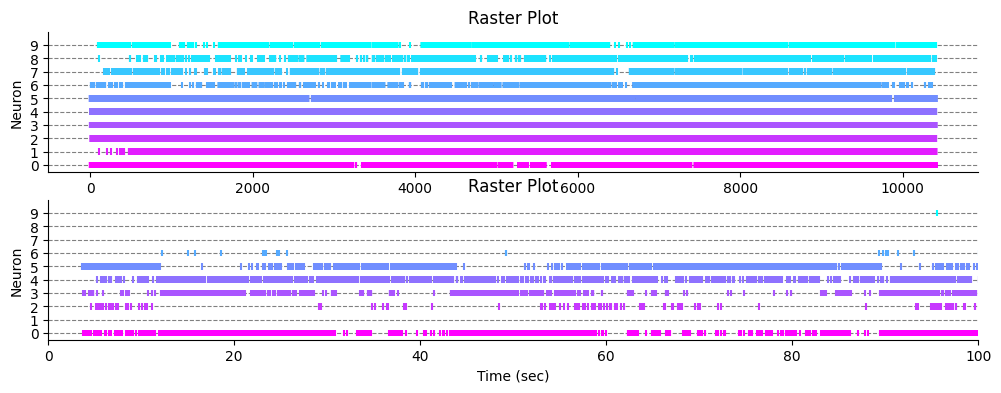

In [23]:
# Extract VISp neurons spike timing and plot as a raster plot
region = 'VISp'
units = session.units[session.units["ecephys_structure_acronym"] == region]
# display(units)

# Extract spike timing
spike_times = []
for unit_id in units.index:
    spike_times.append(session.spike_times[unit_id])

# plot
num_plot_neurons = 10
color_idx = np.linspace(1, 0, num_plot_neurons)

# Create a raster plot
plt.figure(figsize=(12, 4))
plt.subplot(211)
plt.eventplot(spike_times[0:num_plot_neurons], linelengths=0.5, color=plt.cm.cool(color_idx))

# Set axis labels and spines
plt.xlabel('Time (sec)')
plt.ylabel('Neuron')
plt.title('Raster Plot')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

# Set y-axis tick positions according to the number of neurons
plt.yticks(np.arange(0, num_plot_neurons))
plt.ylim(-0.5, num_plot_neurons)

# Display grid lines
plt.grid(True, axis='y', linestyle='--', color='gray')

plt.subplot(212)
plt.eventplot(spike_times[0:num_plot_neurons], linelengths=0.5, color=plt.cm.cool(color_idx))

# Set x-axis limitation
plt.xlim(0, 100)

# Set axis labels and spines
plt.xlabel('Time (sec)')
plt.ylabel('Neuron')
plt.title('Raster Plot')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

# Set y-axis tick positions according to the number of neurons
plt.yticks(np.arange(0, num_plot_neurons))
plt.ylim(-0.5, num_plot_neurons)

# Display grid lines
plt.grid(True, axis='y', linestyle='--', color='gray')

# Save
plt.savefig(output_Dir+'/Spike-train.png')

In [24]:
def sptimes2binraster(session, region, time_window, binwidth, session_dir):
    '''
        This function returns binned spike train
        Parameters
        ----------
        session: session metainfo
        region: region of intereset i.e. VISp, CA1
        time_window: time window for binning (s)
        binwidth: binwidth (s)
        session_dir: session directory
    ''' 
    import pickle
    out_dir = session_dir+'/binraster'
    os.makedirs(out_dir, exist_ok=True)
    f_name = out_dir+'/binraster_'+ region+'_'+str(time_window[0])+'-'+str(time_window[1])+'.pkl'
    
    if os.path.exists(f_name)==False:
        units = session.units[session.units["ecephys_structure_acronym"] == region]
        time = np.arange(time_window[0], time_window[1], binwidth)
        binRaster = []
        for unit_id in units.index:
            binRaster_tmp = np.zeros(int(time_window[1]/binwidth-time_window[0]/binwidth))
            for bin_id in range(len(binRaster_tmp)):
                bin_window=time_window[0]+bin_id*binwidth #slide bin window
                binRaster_tmp[bin_id]=len(np.where((bin_window<=session.spike_times[unit_id]) & (bin_window+binwidth>session.spike_times[unit_id]))[0]) #binning
            binRaster.append(binRaster_tmp)
        binRaster=np.array(binRaster)
        with open(f_name, 'wb') as f:
            pickle.dump(binRaster,f)
    else:
        with open(f_name, 'rb') as f:
            binRaster =  pickle.load(f)
    
    return binRaster

In [25]:
%%time
# Binning the spike trains
time_window = [0,10409]
binwidth=0.025
binraster_VISp = sptimes2binraster(session=session, region='VISp', time_window=time_window, binwidth=binwidth, session_dir=session_dir)
# binraster_VISrl = sptimes2binraster(session=session, region='VISrl', time_window=time_window, binwidth=binwidth, session_dir=session_dir)
# binraster_VISl = sptimes2binraster(session=session, region='VISl', time_window=time_window, binwidth=binwidth, session_dir=session_dir)
# binraster_VISam = sptimes2binraster(session=session, region='VISam', time_window=time_window, binwidth=binwidth, session_dir=session_dir)
# binraster_VISal = sptimes2binraster(session=session, region='VISal', time_window=time_window, binwidth=binwidth, session_dir=session_dir)

# binraster_CA1 = sptimes2binraster(session=session, region='CA1', time_window=time_window, binwidth=binwidth, session_dir=session_dir)
# binraster_CA3 = sptimes2binraster(session=session, region='CA3', time_window=time_window, binwidth=binwidth, session_dir=session_dir)

CPU times: user 895 µs, sys: 140 ms, total: 141 ms
Wall time: 144 ms


In [26]:
# %%time
# time_window = [0,10409]
# binwidth=0.025
# binraster_all={}
# for region in session.structurewise_unit_counts.keys():
#     binraster=sptimes2binraster(session=session, region=region, time_window=time_window, binwidth=binwidth, session_dir=session_dir)
#     binraster_all.update({region: binraster})

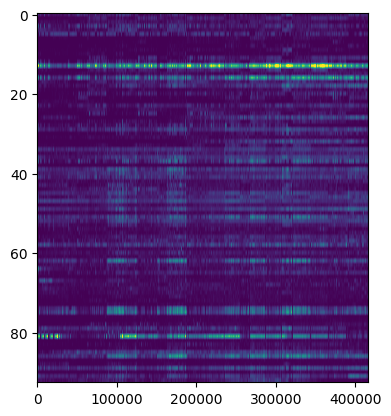

In [27]:
plt.imshow(binraster_VISp, aspect=5000, vmin=0, vmax=2)

In [28]:
session.stimulus_presentations[session.stimulus_presentations['stimulus_name']=='static_gratings']

,color,contrast,frame,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
49434,null,0.8,null,120.0,0.75,"[250.0, 250.0]",0.08,5403.656032,8.0,static_gratings,5403.906249,null,null,null,0.250216,4787
49435,null,0.8,null,90.0,0.75,"[250.0, 250.0]",0.02,5403.906249,8.0,static_gratings,5404.156465,null,null,null,0.250216,4788
49436,null,0.8,null,90.0,0.75,"[250.0, 250.0]",0.02,5404.156465,8.0,static_gratings,5404.406681,null,null,null,0.250216,4788
49437,null,0.8,null,150.0,0.5,"[250.0, 250.0]",0.02,5404.406681,8.0,static_gratings,5404.656897,null,null,null,0.250216,4789
49438,null,0.8,null,0.0,0.25,"[250.0, 250.0]",0.08,5404.656897,8.0,static_gratings,5404.907096,null,null,null,0.250199,4790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70385,null,0.8,null,150.0,0.0,"[250.0, 250.0]",0.16,9155.543396,14.0,static_gratings,9155.793607,null,null,null,0.250211,4851
70386,null,0.8,null,60.0,0.75,"[250.0, 250.0]",0.16,9155.793607,14.0,static_gratings,9156.043811,null,null,null,0.250204,4824
70387,null,0.8,null,150.0,0.0,"[250.0, 250.0]",0.02,9156.043811,14.0,static_gratings,9156.294015,null,null,null,0.250204,4906


In [29]:
stimulus_onset = np.array(session.stimulus_presentations[(session.stimulus_presentations['stimulus_name']=='flashes') 
                                                        & (session.stimulus_presentations['color']==1.0)]['start_time'])
# stimulus_onset = np.array(session.stimulus_presentations[(session.stimulus_presentations['stimulus_name']=='static_gratings') 
#                                                         & (session.stimulus_presentations['orientation']==0.0)]['start_time'])
# stimulus_onset = np.array(session.stimulus_presentations[(session.stimulus_presentations['stimulus_name']=='drifting_gratings') 
#                                                         & (session.stimulus_presentations['orientation']==0.0)]['start_time'])
# stimulus_onset = np.array(session.stimulus_presentations[(session.stimulus_presentations['stimulus_name']=='drifting_gratings') 
#                                                         & (session.stimulus_presentations['orientation']==0.0) 
#                                                         & (session.stimulus_presentations['temporal_frequency']==4)]['start_time'])



In [30]:
def calc_PSTH(binraster, stimulus_onset, binwidth, peri_stim_window):
    '''
    Calculate the z-scored PSTH (Peri-Stimulus Time Histogram) of each neuron.

    Parameters:
    - binraster: binned raster of spike data (N neurons x time bins).
    - stimulus_onset: Time (in seconds) when the stimulus is presented.
    - binwidth: Width of the time bins for assembly detection.
    - peri_stim_window: Time window for PSTH (in seconds) relative to stimulus onset.

    Returns:
    - time_psth: Time vector for the PSTH.
    - z_binraster_PSTH: Z-scored PSTH for each neuron.
    '''

    # Generate the time vector for the PSTH
    time_psth = np.arange(peri_stim_window[0] / binwidth, (peri_stim_window[1] + binwidth) / binwidth) * binwidth

    # Calculate binned values for stimulus onset and peri-stimulus windows
    binned_stimulus_onset = stimulus_onset / binwidth
    binned_pre_stim_windows = np.round((binned_stimulus_onset + peri_stim_window[0] / binwidth)).astype(int)
    binned_post_stim_windows = np.round((binned_stimulus_onset + peri_stim_window[1] / binwidth)).astype(int)

    # Z-score the binary raster data along the time axis
    z_binraster = stats.zscore(binraster, axis=1)

    # Initialize a list to store z-scored PSTH for each neuron
    z_binraster_PSTH = []

    # Calculate PSTH for each neuron
    for k in range(z_binraster.shape[0]):
        z_binraster_PSTH_tmp = []
        for i in range(len(binned_pre_stim_windows)):
            tmp = z_binraster[k][binned_pre_stim_windows[i]:binned_post_stim_windows[i] + 1]
            z_binraster_PSTH_tmp.append(tmp)
        z_binraster_PSTH.append(z_binraster_PSTH_tmp)

    # Convert the list of PSTHs into a NumPy array
    z_binraster_PSTH = np.array(z_binraster_PSTH)

    return time_psth, z_binraster_PSTH


In [31]:
peri_stim_window = [-0.2, 0.5]
time_psth, z_binraster_PSTH_VISp = calc_PSTH(binraster_VISp, stimulus_onset, binwidth, peri_stim_window)


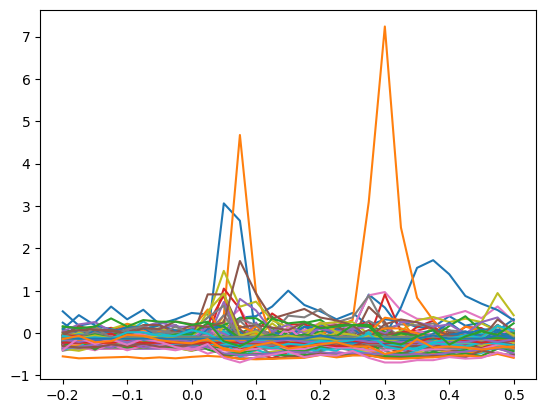

In [32]:
plt.plot(time_psth, np.mean(z_binraster_PSTH_VISp,axis=1).T);